In [8]:
import json 
from collections import Counter
from tqdm import tqdm 
from colorama import Style,Fore
import os
from dotenv import load_dotenv
load_dotenv()

False

In [9]:
from utils1 import openJson,saveJson

## Filtering 1

- videosF1.json contain the videos with fr-FR on the language parameter

In [5]:
videosR3 = openJson("../jsons/videosR3.json")
len(videosR3)

6859

In [7]:
videosF1 = []
for video in videosR3:
    if video['langue']== 'fr-FR':
        videosF1.append(video)
saveJson("../jsons/videosF1.json",videosF1)
len(videosF1)


 json saved


4722

## Filtering 2

### Detecter les videos des Chaines TV 

In [116]:
chainesTv = [
    "France 2", "France 3", "France 4","France 5","Franceinfo",
    "BFMTV", "C8", "CStar", "Gulli", "Cnews",
    "Canal+", "Planète+", "LCI", "Paris première",
    "6ter", "Arte", "M6", "W9",
    "TFX", "TMC", "NRJ12", "TF1","La Chaîne parlementaire",
    "Chérie 25", "RMC"
]
chainesTv = [nomTV.lower().replace(" ", "") for nomTV in chainesTv]

print(len(chainesTv))
print(chainesTv)

25
['france2', 'france3', 'france4', 'france5', 'franceinfo', 'bfmtv', 'c8', 'cstar', 'gulli', 'cnews', 'canal+', 'planète+', 'lci', 'parispremière', '6ter', 'arte', 'm6', 'w9', 'tfx', 'tmc', 'nrj12', 'tf1', 'lachaîneparlementaire', 'chérie25', 'rmc']


In [117]:
videosF1 = openJson("../jsons/videosF1.json")
len(videosF1)

4722

In [118]:
channels = openJson("../../collecting/jsons/channels.json")
def getChannelName(channelId):
    for channel in channels:
        if channel['id_chaine']==channelId:
            return channel['nom_chaine'].lower().replace(" ", "")

In [126]:
chainesTVCounter = Counter()
videosChainesTV = []
for video in videosF1:
    channelName = getChannelName(video['id_chaine'])
    for name in chainesTv:
        if name in channelName:  
            print(name,' ',channelName,' ',video['id_video'])
            chainesTVCounter[name]+=1
            videosChainesTV.append(video['id_video'])

france3   france3grandest   dLUQ0xpq8g4
france3   france3normandie   y16Qgap0wW8
france3   france3nouvelle-aquitaine   TFeG6-UKO9U
tf1   tf1info   ojIs2lHKYdA
france3   france3normandie   HXbStCizF74
france3   france3bourgogne-franche-comté   A1jj7uXSxs4
france3   france3occitanie   IRFs_Ixy9ZM
france3   france3hauts-de-france   hoFV4QDkWa8
france3   france3toutesrégions   iC-3Wo43Bro
france3   france3nouvelle-aquitaine   tGj_1evPWN0
arte   arte   r9wRwvEHFsA
france3   france3occitanie   yjjRv-nEdHE
france3   france3grandest   HflJXjrYBCE
france3   france3corseviastella   b7nV4URjwDk
arte   arte   q_nt-DDvq4o
france3   france3occitanie   oxjQ2xSDRU8
france2   france24   jsFCmSWQmUs
france2   france24   fRyK_Fky8q4
tf1   tf1info   g11uU0ezC7s
france3   france3provence-alpes-côted'azur   ul0lmV0rQvM
arte   météoàlacarte-francetélévisions   96N7p51oO4c
france2   france24   rX8xnkiAAOA
france3   france3nouvelle-aquitaine   MnZwX830SMQ
france3   france3bourgogne-franche-comté   yMD5K1sibMo


In [121]:
chainesTVCounter

Counter({'france3': 146,
         'arte': 37,
         'france2': 10,
         'bfmtv': 8,
         'tf1': 7,
         'cnews': 5,
         'lci': 3,
         'rmc': 1,
         'canal+': 1})

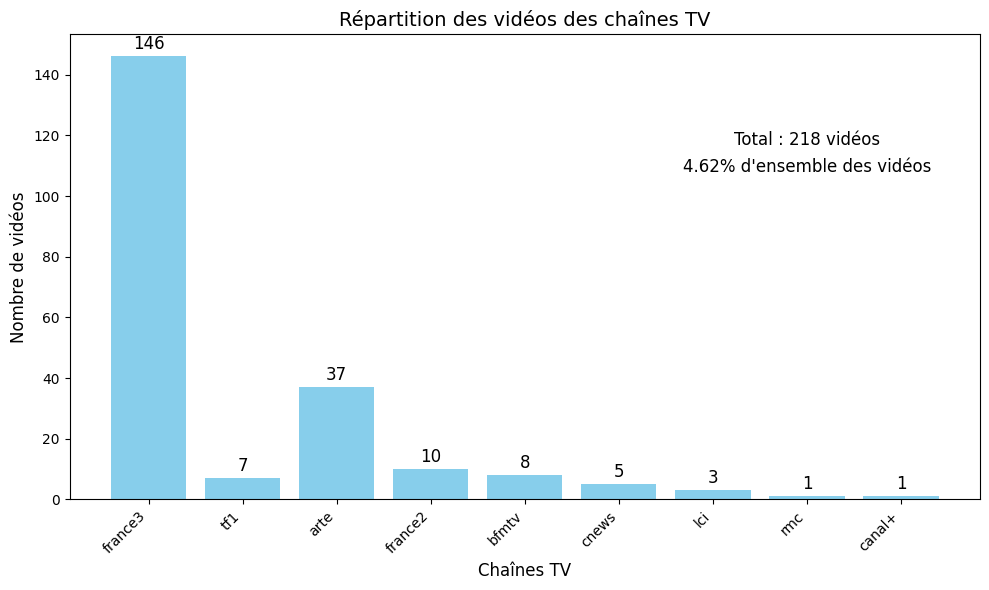

In [124]:
import matplotlib.pyplot as plt

labels = list(chainesTVCounter.keys())
sizes = list(chainesTVCounter.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color='skyblue')

plt.title("Répartition des vidéos des chaînes TV", fontsize=14)
plt.xlabel("Chaînes TV", fontsize=12)
plt.ylabel("Nombre de vidéos", fontsize=12)
plt.xticks(rotation=45, ha='right')

total_videos_tv = sum(sizes)
plt.text(len(labels) - 2, max(sizes) * 0.8, f"Total : {total_videos_tv} vidéos", fontsize=12, ha='center')
plt.text(len(labels) - 2, max(sizes) * 0.74, "4.62% d'ensemble des vidéos", fontsize=12, ha='center')

# Ajouter les nombres au-dessus des barres et les rendre en gras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{int(yval)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [123]:
(218/len(videosF1))*100

4.616687844133842

### Creer videosF2.json

In [135]:
videosChainesTV

['dLUQ0xpq8g4',
 'y16Qgap0wW8',
 'TFeG6-UKO9U',
 'ojIs2lHKYdA',
 'HXbStCizF74',
 'A1jj7uXSxs4',
 'IRFs_Ixy9ZM',
 'hoFV4QDkWa8',
 'iC-3Wo43Bro',
 'tGj_1evPWN0',
 'r9wRwvEHFsA',
 'yjjRv-nEdHE',
 'HflJXjrYBCE',
 'b7nV4URjwDk',
 'q_nt-DDvq4o',
 'oxjQ2xSDRU8',
 'jsFCmSWQmUs',
 'fRyK_Fky8q4',
 'g11uU0ezC7s',
 'ul0lmV0rQvM',
 '96N7p51oO4c',
 'rX8xnkiAAOA',
 'MnZwX830SMQ',
 'yMD5K1sibMo',
 '6w3hqPHPogA',
 'zZ0btQ-aZv8',
 'NYCCwOdqPDA',
 'WevIdMyvFUk',
 'epHgTx5XZTU',
 'lokfk0lj9Rk',
 'U5CQvKiLoCo',
 'uVmlqnrKKoA',
 'NRZa1ciorPg',
 'LsCnUBSPg6M',
 'jtfRpgVpuKU',
 'iiZFEGe0BmI',
 'Jjg9Pz_mZ1w',
 'boNqBNbVT7I',
 'q2Th8GIx2zI',
 'mePq4SsM1dw',
 'j0vCFOUMhSk',
 'IDSnX_flvs8',
 'n6oZoAGd-Hg',
 'JuN34OyMKEo',
 'bVQRUPP_FR8',
 'OzgkisPNHz8',
 'B43uPl2LP2U',
 'HfNYyNNlBfc',
 'DIDiDXLBdXM',
 '-TttfNfM55o',
 'jBCVqs3ubkY',
 'OhQccUoW9j4',
 'KGbeiCal8hI',
 'kggG5ewMsko',
 'y3VnajeE0DY',
 'Fd89ir0heWQ',
 'nG7ZrFRv_H4',
 'XCIHepMpkVk',
 'fqimFtLhDQk',
 'Bw1N_z3sLXk',
 'JyTBmA2eaEU',
 '_Qh2R-G5IFI',
 'Y7EjXc

In [128]:
len(videosChainesTV)

218

In [133]:
videosF2 = []
for video in videosF1:
    if video['id_video'] not in videosChainesTV:
        videosF2.append(video)
saveJson("../jsons/videosF2.json",videosF2)


 json saved


verification

In [134]:
len(videosF1)-len(videosF2)

218

In [136]:
len(videosF1)

4722

## Filtering 3

In [5]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("dangvantuan/sentence-camembert-base")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.27k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/463 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
from sentence_transformers import util

def calculateSimilarity(videoMD, youtubequeries):
    embedding_video = model.encode([videoMD], convert_to_tensor=True, normalize_embeddings=True)
    embeddings_queries = model.encode(youtubequeries, convert_to_tensor=True, normalize_embeddings=True)
    scores = util.cos_sim(embedding_video, embeddings_queries)[0]
    simScore = scores.mean().item()
    return simScore


In [12]:
requete = "Mes livres préférés pour l'AUTONOMIE/AUTOSUFFISANCE : potager, élevage, cuisine, transfo ect)"

documents =  [
    "autosuffisance potager",
    "autosuffisance poêle à bois bouilleur",
    "autosuffisance maison torchis",
    "autosuffisance aquaponie",
    "autosuffisance filtration naturelle",
    "autosuffisance fumage",
    "autosuffisance legumes",
    "autosuffisance agriculture biologique",
    "autosuffisance arbres fruitiers",
    "autosuffisance mangeoire automatique",
    "autosuffisance sol vivant",
    "autosuffisance compost",
    "autosuffisance décomposeurs",
    "autosuffisance fertilisant",
    "autosuffisance rotation des cultures",
    "autosuffisance salades",
    "autosuffisance plantation",
    "autosuffisance légumineuses",
    "autosuffisance microferme",
    "autosuffisance cultures sous les arbres",
    "autosuffisance pollinisation",
    "autosuffisance plantes",
    "autosuffisance tuteurage",
    "autosuffisance germination",
    "autosuffisance maison en ossature bois",
    "autosuffisance fruitier",
    "autosuffisance fromage",
    "autosuffisance foin",
    "autosuffisance sol",
    "autosuffisance haricots",
    "autosuffisance eau",
    "autosuffisance pomme de terre",
    "autosuffisance itinéraire technique",
    "autosuffisance sécheresse",
    "autosuffisance cendre",
    "autosuffisance changement climatique",
    "autosuffisance bio",
    "autosuffisance lombricompost",
    "autosuffisance courgettes",
    "autosuffisance azote",
    "autosuffisance marc de café",
    "autosuffisance cultures précoces",
    "autosuffisance fertilisation organique",
    "autosuffisance exploitation agricole",
    "autosuffisance poullailler",
    "autosuffisance cultivate",
    "autosuffisance amendement",
    "autosuffisance fientes de poulet",
    "autosuffisance fumier",
    "autosuffisance terres",
    "autosuffisance eau dynamisée",
    "autosuffisance résilience",
    "autosuffisance lombricomposteur",
    "autosuffisance plantes médicinales",
    "autosuffisance chaux",
    "autosuffisance choux Daubenton",
    "autosuffisance vivace",
    "autosuffisance tracteur",
    "autosuffisance panneau solaire",
    "autosuffisance installation solaire",
    "autosuffisance glycol",
    "autonomie potager",
    "autonomie poêle à bois bouilleur",
    "autonomie maison torchis",
    "autonomie aquaponie",
    "autonomie filtration naturelle",
    "autonomie fumage",
    "autonomie legumes",
    "autonomie agriculture biologique",
    "autonomie arbres fruitiers",
    "autonomie mangeoire automatique",
    "autonomie sol vivant",
    "autonomie compost",
    "autonomie décomposeurs",
    "autonomie fertilisant",
    "autonomie rotation des cultures",
    "autonomie salades",
    "autonomie plantation",
    "autonomie légumineuses",
    "autonomie microferme",
    "autonomie cultures sous les arbres",
    "autonomie pollinisation",
    "autonomie plantes",
    "autonomie tuteurage",
    "autonomie germination",
    "autonomie maison en ossature bois",
    "autonomie fruitier",
    "autonomie fromage",
    "autonomie foin",
    "autonomie sol",
    "autonomie haricots",
    "autonomie eau",
    "autonomie pomme de terre",
    "autonomie itinéraire technique",
    "autonomie sécheresse",
    "autonomie cendre",
    "autonomie changement climatique",
    "autonomie bio",
    "autonomie lombricompost",
    "autonomie courgettes",
    "autonomie azote",
    "autonomie marc de café",
    "autonomie cultures précoces",
    "autonomie fertilisation organique",
    "autonomie exploitation agricole",
    "autonomie poullailler",
    "autonomie cultivate",
    "autonomie amendement",
    "autonomie fientes de poulet",
    "autonomie fumier",
    "autonomie terres",
    "autonomie eau dynamisée",
    "autonomie résilience",
    "autonomie lombricomposteur",
    "autonomie plantes médicinales",
    "autonomie chaux",
    "autonomie choux Daubenton",
    "autonomie vivace",
    "autonomie tracteur",
    "autonomie panneau solaire",
    "autonomie installation solaire",
    "autonomie glycol",
    "vie en autarcie potager",
    "vie en autarcie poêle à bois bouilleur",
    "vie en autarcie maison torchis",
    "vie en autarcie aquaponie",
    "vie en autarcie filtration naturelle",
    "vie en autarcie fumage",
    "vie en autarcie legumes",
    "vie en autarcie agriculture biologique",
    "vie en autarcie arbres fruitiers",
    "vie en autarcie mangeoire automatique",
    "vie en autarcie sol vivant",
    "vie en autarcie compost",
    "vie en autarcie décomposeurs",
    "vie en autarcie fertilisant",
    "vie en autarcie rotation des cultures",
    "vie en autarcie salades",
    "vie en autarcie plantation",
    "vie en autarcie légumineuses",
    "vie en autarcie microferme",
    "vie en autarcie cultures sous les arbres",
    "vie en autarcie pollinisation",
    "vie en autarcie plantes",
    "vie en autarcie tuteurage",
    "vie en autarcie germination",
    "vie en autarcie maison en ossature bois",
    "vie en autarcie fruitier",
    "vie en autarcie fromage",
    "vie en autarcie foin",
    "vie en autarcie sol",
    "vie en autarcie haricots",
    "vie en autarcie eau",
    "vie en autarcie pomme de terre",
    "vie en autarcie itinéraire technique",
    "vie en autarcie sécheresse",
    "vie en autarcie cendre",
    "vie en autarcie changement climatique",
    "vie en autarcie bio",
    "vie en autarcie lombricompost",
    "vie en autarcie courgettes",
    "vie en autarcie azote",
    "vie en autarcie marc de café",
    "vie en autarcie cultures précoces",
    "vie en autarcie fertilisation organique",
    "vie en autarcie exploitation agricole",
    "vie en autarcie poullailler",
    "vie en autarcie cultivate",
    "vie en autarcie amendement",
    "vie en autarcie fientes de poulet",
    "vie en autarcie fumier",
    "vie en autarcie terres",
    "vie en autarcie eau dynamisée",
    "vie en autarcie résilience",
    "vie en autarcie lombricomposteur",
    "vie en autarcie plantes médicinales",
    "vie en autarcie chaux",
    "vie en autarcie choux Daubenton",
    "vie en autarcie vivace",
    "vie en autarcie tracteur",
    "vie en autarcie panneau solaire",
    "vie en autarcie installation solaire",
    "vie en autarcie glycol",
    "habitats autonomes potager",
    "habitats autonomes poêle à bois bouilleur",
    "habitats autonomes maison torchis",
    "habitats autonomes aquaponie",
    "habitats autonomes filtration naturelle",
    "habitats autonomes fumage",
    "habitats autonomes legumes",
    "habitats autonomes agriculture biologique",
    "habitats autonomes arbres fruitiers",
    "habitats autonomes mangeoire automatique",
    "habitats autonomes sol vivant",
    "habitats autonomes compost",
    "habitats autonomes décomposeurs",
    "habitats autonomes fertilisant",
    "habitats autonomes rotation des cultures",
    "habitats autonomes salades",
    "habitats autonomes plantation",
    "habitats autonomes légumineuses",
    "habitats autonomes microferme",
    "habitats autonomes cultures sous les arbres",
    "habitats autonomes pollinisation",
    "habitats autonomes plantes",
    "habitats autonomes tuteurage",
    "habitats autonomes germination",
    "habitats autonomes maison en ossature bois",
    "habitats autonomes fruitier",
    "habitats autonomes fromage",
    "habitats autonomes foin",
    "habitats autonomes sol",
    "habitats autonomes haricots",
    "habitats autonomes eau",
    "habitats autonomes pomme de terre",
    "habitats autonomes itinéraire technique",
    "habitats autonomes sécheresse",
    "habitats autonomes cendre",
    "habitats autonomes changement climatique",
    "habitats autonomes bio",
    "habitats autonomes lombricompost",
    "habitats autonomes courgettes",
    "habitats autonomes azote",
    "habitats autonomes marc de café",
    "habitats autonomes cultures précoces",
    "habitats autonomes fertilisation organique",
    "habitats autonomes exploitation agricole",
    "habitats autonomes poullailler",
    "habitats autonomes cultivate",
    "habitats autonomes amendement",
    "habitats autonomes fientes de poulet",
    "habitats autonomes fumier",
    "habitats autonomes terres",
    "habitats autonomes eau dynamisée",
    "habitats autonomes résilience",
    "habitats autonomes lombricomposteur",
    "habitats autonomes plantes médicinales",
    "habitats autonomes chaux",
    "habitats autonomes choux Daubenton",
    "habitats autonomes vivace",
    "habitats autonomes tracteur",
    "habitats autonomes panneau solaire",
    "habitats autonomes installation solaire",
    "habitats autonomes glycol",
    "ferme autonome potager",
    "ferme autonome poêle à bois bouilleur",
    "ferme autonome maison torchis",
    "ferme autonome aquaponie",
    "ferme autonome filtration naturelle",
    "ferme autonome fumage",
    "ferme autonome legumes",
    "ferme autonome agriculture biologique",
    "ferme autonome arbres fruitiers",
    "ferme autonome mangeoire automatique",
    "ferme autonome sol vivant",
    "ferme autonome compost",
    "ferme autonome décomposeurs",
    "ferme autonome fertilisant",
    "ferme autonome rotation des cultures",
    "ferme autonome salades",
    "ferme autonome plantation",
    "ferme autonome légumineuses",
    "ferme autonome microferme",
    "ferme autonome cultures sous les arbres",
    "ferme autonome pollinisation",
    "ferme autonome plantes",
    "ferme autonome tuteurage",
    "ferme autonome germination",
    "ferme autonome maison en ossature bois",
    "ferme autonome fruitier",
    "ferme autonome fromage",
    "ferme autonome foin",
    "ferme autonome sol",
    "ferme autonome haricots",
    "ferme autonome eau",
    "ferme autonome pomme de terre",
    "ferme autonome itinéraire technique",
    "ferme autonome sécheresse",
    "ferme autonome cendre",
    "ferme autonome changement climatique",
    "ferme autonome bio",
    "ferme autonome lombricompost",
    "ferme autonome courgettes",
    "ferme autonome azote",
    "ferme autonome marc de café",
    "ferme autonome cultures précoces",
    "ferme autonome fertilisation organique",
    "ferme autonome exploitation agricole",
    "ferme autonome poullailler",
    "ferme autonome cultivate",
    "ferme autonome amendement",
    "ferme autonome fientes de poulet",
    "ferme autonome fumier",
    "ferme autonome terres",
    "ferme autonome eau dynamisée",
    "ferme autonome résilience",
    "ferme autonome lombricomposteur",
    "ferme autonome plantes médicinales",
    "ferme autonome chaux",
    "ferme autonome choux Daubenton",
    "ferme autonome vivace",
    "ferme autonome tracteur",
    "ferme autonome panneau solaire",
    "ferme autonome installation solaire",
    "ferme autonome glycol",
    "éco-lieu potager",
    "éco-lieu poêle à bois bouilleur",
    "éco-lieu maison torchis",
    "éco-lieu aquaponie",
    "éco-lieu filtration naturelle",
    "éco-lieu fumage",
    "éco-lieu legumes",
    "éco-lieu agriculture biologique",
    "éco-lieu arbres fruitiers",
    "éco-lieu mangeoire automatique",
    "éco-lieu sol vivant",
    "éco-lieu compost",
    "éco-lieu décomposeurs",
    "éco-lieu fertilisant",
    "éco-lieu rotation des cultures",
    "éco-lieu salades",
    "éco-lieu plantation",
    "éco-lieu légumineuses",
    "éco-lieu microferme",
    "éco-lieu cultures sous les arbres",
    "éco-lieu pollinisation",
    "éco-lieu plantes",
    "éco-lieu tuteurage",
    "éco-lieu germination",
    "éco-lieu maison en ossature bois",
    "éco-lieu fruitier",
    "éco-lieu fromage",
    "éco-lieu foin",
    "éco-lieu sol",
    "éco-lieu haricots",
    "éco-lieu eau",
    "éco-lieu pomme de terre",
    "éco-lieu itinéraire technique",
    "éco-lieu sécheresse",
    "éco-lieu cendre",
    "éco-lieu changement climatique",
    "éco-lieu bio",
    "éco-lieu lombricompost",
    "éco-lieu courgettes",
    "éco-lieu azote",
    "éco-lieu marc de café",
    "éco-lieu cultures précoces",
    "éco-lieu fertilisation organique",
    "éco-lieu exploitation agricole",
    "éco-lieu poullailler",
    "éco-lieu cultivate",
    "éco-lieu amendement",
    "éco-lieu fientes de poulet",
    "éco-lieu fumier",
    "éco-lieu terres",
    "éco-lieu eau dynamisée",
    "éco-lieu résilience",
    "éco-lieu lombricomposteur",
    "éco-lieu plantes médicinales",
    "éco-lieu chaux",
    "éco-lieu choux Daubenton",
    "éco-lieu vivace",
    "éco-lieu tracteur",
    "éco-lieu panneau solaire",
    "éco-lieu installation solaire",
    "éco-lieu glycol"
  ]

calculateSimilarity(requete,documents)

0.14659950137138367

In [16]:
contexte_autosuffisance = [
    "Potager familial productif pour l'autonomie en légumes",
    "Élevage de poules, moutons et canards pour l’autonomie alimentaire",
    "Utilisation de plantes médicinales et aromatiques cultivées sur place",
    "Récupération et filtration de l'eau via un puits et osmose inverse",
    "Construction de bacs permacoles faits maison pour une culture efficace",
    "Transformation du sol en terre fertile pour maximiser les rendements",
    "Vie en sobriété heureuse et respect de la nature",
    "Utilisation de semences locales et choix variétal réfléchi",
    "Production locale de viande, œufs et légumes",
    "Utilisation d'une serre pour prolonger les cultures",
    "Métiers artisanaux (ébénisterie, photographie culinaire) intégrés dans le mode de vie",
    "Conception d’un lieu de vie en autonomie énergétique et alimentaire"
]


In [18]:
videosF2 = openJson("../jsons/videosF2.json")
scores = {}
for video in tqdm(videosF2):
    context = video['titre_video'] + video['description'] + ' '.join(video['tags'])
    score = calculateSimilarity(context,documents)
    print(score,'  ',video['id_video'])
    scores[video['id_video']]=score


  0%|          | 1/4504 [00:07<9:46:22,  7.81s/it]

0.12522189319133759    NRzflSM89iI


  0%|          | 2/4504 [00:17<11:29:00,  9.18s/it]

0.17426565289497375    6CI-4_XszYg


  0%|          | 3/4504 [00:25<10:39:29,  8.52s/it]

0.1539665013551712    E1Zo4dBPbGM


  0%|          | 4/4504 [00:36<11:47:30,  9.43s/it]

0.09188460558652878    z35x21dbhsw


  0%|          | 5/4504 [00:44<11:15:21,  9.01s/it]

0.14590317010879517    iF3O2TSheXI


  0%|          | 6/4504 [00:54<11:38:20,  9.32s/it]

0.09888356178998947    9nl8mw96R90


  0%|          | 7/4504 [01:02<11:08:49,  8.92s/it]

0.11587613075971603    viSl4Gv9mqU


  0%|          | 8/4504 [01:12<11:25:10,  9.14s/it]

0.05904807522892952    A31isr90nNI


  0%|          | 9/4504 [01:20<10:54:34,  8.74s/it]

0.07330767810344696    9-pbc-zRdss


  0%|          | 10/4504 [01:30<11:30:55,  9.22s/it]

0.13107413053512573    _l191QtAqlc


  0%|          | 11/4504 [01:41<12:10:50,  9.76s/it]

0.10049177706241608    -5ahOCpQi-k


  0%|          | 12/4504 [01:49<11:28:16,  9.19s/it]

0.11352601647377014    7dO0lOOPZVw


  0%|          | 13/4504 [01:59<11:38:13,  9.33s/it]

0.08490554988384247    pCf8PjSn6xs


  0%|          | 14/4504 [02:08<11:31:30,  9.24s/it]

0.08423230051994324    YER-2qYt2B0


  0%|          | 15/4504 [02:17<11:29:20,  9.21s/it]

0.010712231509387493    lSoWicUMVlM


  0%|          | 16/4504 [02:25<11:09:13,  8.95s/it]

0.1582910567522049    G4_vmWaSU3Q


  0%|          | 17/4504 [02:33<10:42:04,  8.59s/it]

0.11804836243391037    CbPHyfHqIHw


  0%|          | 18/4504 [02:43<11:10:32,  8.97s/it]

0.19018098711967468    yu5wQ_e1UMo


  0%|          | 19/4504 [02:51<10:43:58,  8.62s/it]

0.1649240255355835    1UvvwnWkFho


  0%|          | 20/4504 [03:00<11:03:30,  8.88s/it]

0.027286991477012634    tbrycDTUECg


  0%|          | 21/4504 [03:08<10:46:17,  8.65s/it]

-0.02901868149638176    e2gMKuiDxQY


  0%|          | 22/4504 [03:19<11:33:42,  9.29s/it]

0.0738668218255043    VmaB1cxsLxA


  1%|          | 23/4504 [03:29<11:59:53,  9.64s/it]

0.07115449756383896    -PYlxVfbEGA


  1%|          | 24/4504 [03:38<11:29:50,  9.24s/it]

0.12048967182636261    IG35vKlx0U0


  1%|          | 25/4504 [03:47<11:42:44,  9.41s/it]

0.1175050139427185    EyExd5h_j3M


  1%|          | 26/4504 [03:56<11:29:39,  9.24s/it]

0.1027696505188942    pzMvlEuc7xc


  1%|          | 27/4504 [04:06<11:32:21,  9.28s/it]

0.12154670804738998    -6ecq5hc5ig


  1%|          | 28/4504 [04:14<11:12:54,  9.02s/it]

0.14580528438091278    gjcxL3mVVe0


  1%|          | 29/4504 [04:24<11:26:46,  9.21s/it]

0.05499275028705597    VC0jyL7qnDU


  1%|          | 30/4504 [04:32<11:12:02,  9.01s/it]

0.12130878865718842    1Tur0zcDnvU


  1%|          | 31/4504 [04:42<11:24:04,  9.18s/it]

0.08566529303789139    XYZwomaR3ns


  1%|          | 32/4504 [04:50<11:06:12,  8.94s/it]

0.15773630142211914    0nZyupbiRVQ


  1%|          | 33/4504 [05:01<11:44:38,  9.46s/it]

0.13179506361484528    LJP8bYpCBPI


  1%|          | 34/4504 [05:11<11:59:18,  9.66s/it]

0.164107546210289    7ZnBr3v59Iw


  1%|          | 35/4504 [05:19<11:28:07,  9.24s/it]

0.08383823186159134    HkpV4V4dYOw


  1%|          | 36/4504 [05:28<11:14:36,  9.06s/it]

0.13691072165966034    ayUMX5QFZBs


  1%|          | 37/4504 [05:38<11:28:51,  9.25s/it]

0.09955555200576782    Wcgs5XjxzFs


  1%|          | 38/4504 [05:46<11:13:15,  9.05s/it]

0.1382737010717392    vJSzXIPoOkw


  1%|          | 39/4504 [05:55<11:07:16,  8.97s/it]

0.16849583387374878    aZusRHXECMY


  1%|          | 40/4504 [06:03<10:44:35,  8.66s/it]

0.14704309403896332    LifnAsRRY4E


  1%|          | 41/4504 [06:13<11:13:52,  9.06s/it]

0.08221543580293655    EMKZk61uA0w


  1%|          | 42/4504 [06:21<10:41:01,  8.62s/it]

0.08285196870565414    U7RY1lzS6us


  1%|          | 43/4504 [06:30<11:07:28,  8.98s/it]

0.013404173776507378    _3X3muyDFKY


  1%|          | 44/4504 [06:38<10:46:09,  8.69s/it]

0.08837468177080154    W79c-I7vqFI


  1%|          | 45/4504 [06:50<11:54:03,  9.61s/it]

-0.0041385311633348465    8ChX6276Rhk


  1%|          | 46/4504 [06:59<11:41:14,  9.44s/it]

0.11584722995758057    M92CPBXG0U0


  1%|          | 47/4504 [07:09<11:53:59,  9.61s/it]

0.1844758838415146    FZBgBkMdgTg


  1%|          | 48/4504 [07:20<12:20:39,  9.97s/it]

0.03602290526032448    BCENbxCl7XU


  1%|          | 49/4504 [07:28<11:41:28,  9.45s/it]

0.16035063564777374    ihOZZgTg9hg


  1%|          | 50/4504 [07:39<12:07:32,  9.80s/it]

0.038315750658512115    NgdYYbRCtrc


  1%|          | 51/4504 [07:47<11:41:27,  9.45s/it]

0.026463018730282784    3KxD8q2oWVc


  1%|          | 52/4504 [07:56<11:30:46,  9.31s/it]

0.10203157365322113    5nsdQucYdak


  1%|          | 52/4504 [07:59<11:23:51,  9.22s/it]


KeyboardInterrupt: 

In [17]:
videosF2 = openJson("../jsons/videosF2.json")
scores = {}
for video in tqdm(videosF2):
    context = video['titre_video'] + video['description'] + ' '.join(video['tags'])
    score = calculateSimilarity(context,contexte_autosuffisance)
    print(score,'  ',video['id_video'])
    scores[video['id_video']]=score


  0%|          | 0/4504 [00:00<?, ?it/s]

  0%|          | 1/4504 [00:02<3:40:20,  2.94s/it]

0.24666140973567963    NRzflSM89iI


  0%|          | 2/4504 [00:04<2:34:56,  2.06s/it]

0.2544892728328705    6CI-4_XszYg


  0%|          | 3/4504 [00:05<2:09:21,  1.72s/it]

0.3018917739391327    E1Zo4dBPbGM


  0%|          | 4/4504 [00:06<1:41:36,  1.35s/it]

0.25268277525901794    z35x21dbhsw


  0%|          | 5/4504 [00:07<1:23:57,  1.12s/it]

0.2886052131652832    iF3O2TSheXI


  0%|          | 6/4504 [00:07<1:13:00,  1.03it/s]

0.3012021481990814    9nl8mw96R90


  0%|          | 7/4504 [00:08<1:10:08,  1.07it/s]

0.27946367859840393    viSl4Gv9mqU


  0%|          | 8/4504 [00:09<1:08:49,  1.09it/s]

0.16324396431446075    A31isr90nNI


  0%|          | 9/4504 [00:10<1:10:35,  1.06it/s]

0.18646736443042755    9-pbc-zRdss


  0%|          | 10/4504 [00:11<1:15:23,  1.01s/it]

0.18015508353710175    _l191QtAqlc


  0%|          | 11/4504 [00:12<1:14:20,  1.01it/s]

0.21390224993228912    -5ahOCpQi-k


  0%|          | 12/4504 [00:13<1:07:48,  1.10it/s]

0.19297100603580475    7dO0lOOPZVw


  0%|          | 13/4504 [00:14<1:09:11,  1.08it/s]

0.15504805743694305    pCf8PjSn6xs


  0%|          | 14/4504 [00:15<1:06:17,  1.13it/s]

0.16446198523044586    YER-2qYt2B0


  0%|          | 15/4504 [00:15<1:03:22,  1.18it/s]

0.10104575753211975    lSoWicUMVlM


  0%|          | 16/4504 [00:16<1:01:09,  1.22it/s]

0.2351469248533249    G4_vmWaSU3Q


  0%|          | 17/4504 [00:17<1:03:34,  1.18it/s]

0.22625233232975006    CbPHyfHqIHw


  0%|          | 18/4504 [00:19<1:32:30,  1.24s/it]

0.25443193316459656    yu5wQ_e1UMo


  0%|          | 19/4504 [00:20<1:27:31,  1.17s/it]

0.21378415822982788    1UvvwnWkFho


  0%|          | 20/4504 [00:21<1:19:53,  1.07s/it]

0.13367758691310883    tbrycDTUECg


  0%|          | 21/4504 [00:22<1:09:47,  1.07it/s]

0.08641704171895981    e2gMKuiDxQY


  0%|          | 22/4504 [00:23<1:07:53,  1.10it/s]

0.23149611055850983    VmaB1cxsLxA


  1%|          | 23/4504 [00:24<1:07:45,  1.10it/s]

0.26428404450416565    -PYlxVfbEGA


  1%|          | 24/4504 [00:24<1:04:34,  1.16it/s]

0.10859186202287674    IG35vKlx0U0


  1%|          | 25/4504 [00:25<1:09:18,  1.08it/s]

0.23291051387786865    EyExd5h_j3M


  1%|          | 26/4504 [00:26<1:14:00,  1.01it/s]

0.19022810459136963    pzMvlEuc7xc


  1%|          | 27/4504 [00:27<1:08:18,  1.09it/s]

0.2569611966609955    -6ecq5hc5ig


  1%|          | 28/4504 [00:28<1:04:24,  1.16it/s]

0.2880748510360718    gjcxL3mVVe0


  1%|          | 29/4504 [00:29<59:55,  1.24it/s]  

0.15027040243148804    VC0jyL7qnDU


  1%|          | 30/4504 [00:29<58:18,  1.28it/s]

0.2617793083190918    1Tur0zcDnvU


  1%|          | 31/4504 [00:30<59:15,  1.26it/s]

0.20479021966457367    XYZwomaR3ns


  1%|          | 32/4504 [00:31<59:39,  1.25it/s]

0.2811856269836426    0nZyupbiRVQ


  1%|          | 33/4504 [00:32<1:03:35,  1.17it/s]

0.1956884264945984    LJP8bYpCBPI


  1%|          | 34/4504 [00:33<1:04:20,  1.16it/s]

0.1934119462966919    7ZnBr3v59Iw


  1%|          | 35/4504 [00:34<1:01:05,  1.22it/s]

0.07198984175920486    HkpV4V4dYOw


  1%|          | 36/4504 [00:34<59:38,  1.25it/s]  

0.27434542775154114    ayUMX5QFZBs


  1%|          | 37/4504 [00:35<1:00:34,  1.23it/s]

0.13600905239582062    Wcgs5XjxzFs


  1%|          | 38/4504 [00:36<1:02:26,  1.19it/s]

0.18514300882816315    vJSzXIPoOkw


  1%|          | 39/4504 [00:37<1:01:02,  1.22it/s]

0.17944888770580292    aZusRHXECMY


  1%|          | 40/4504 [00:38<59:57,  1.24it/s]  

0.1815786212682724    LifnAsRRY4E


  1%|          | 41/4504 [00:39<1:16:38,  1.03s/it]

0.045952245593070984    EMKZk61uA0w


  1%|          | 42/4504 [00:41<1:25:07,  1.14s/it]

0.129450261592865    U7RY1lzS6us


  1%|          | 43/4504 [00:41<1:15:55,  1.02s/it]

0.1064584031701088    _3X3muyDFKY


  1%|          | 44/4504 [00:42<1:08:49,  1.08it/s]

0.21849264204502106    W79c-I7vqFI


  1%|          | 45/4504 [00:43<1:04:12,  1.16it/s]

0.05574826896190643    8ChX6276Rhk


  1%|          | 46/4504 [00:44<1:02:14,  1.19it/s]

0.20310012996196747    M92CPBXG0U0


  1%|          | 47/4504 [00:44<1:04:15,  1.16it/s]

0.2922811806201935    FZBgBkMdgTg


  1%|          | 48/4504 [00:45<1:01:12,  1.21it/s]

0.11429282277822495    BCENbxCl7XU


  1%|          | 49/4504 [00:46<1:02:27,  1.19it/s]

0.2583397328853607    ihOZZgTg9hg


  1%|          | 50/4504 [00:47<1:04:53,  1.14it/s]

0.18150430917739868    NgdYYbRCtrc


  1%|          | 51/4504 [00:48<1:13:49,  1.01it/s]

0.17618316411972046    3KxD8q2oWVc


  1%|          | 52/4504 [00:49<1:13:11,  1.01it/s]

0.21890123188495636    5nsdQucYdak


  1%|          | 53/4504 [00:51<1:21:13,  1.09s/it]

0.33847105503082275    XDvc6vkvKJU


  1%|          | 54/4504 [00:51<1:15:40,  1.02s/it]

0.27322500944137573    85i3qfuDK1g


  1%|          | 55/4504 [00:52<1:10:19,  1.05it/s]

0.17660582065582275    jLlyOeOrIzA


  1%|          | 56/4504 [00:53<1:16:38,  1.03s/it]

0.16302619874477386    sOTzAnxcohI


  1%|▏         | 57/4504 [00:55<1:35:04,  1.28s/it]

0.1647396832704544    NHLziogcmNA


  1%|▏         | 58/4504 [00:56<1:30:36,  1.22s/it]

0.2439260631799698    B9oMHIbBJaQ


  1%|▏         | 59/4504 [00:58<1:38:15,  1.33s/it]

0.2668727934360504    -cmVPa6vrHM


  1%|▏         | 60/4504 [00:59<1:32:41,  1.25s/it]

0.1402226686477661    nTi-xbAEjOw


  1%|▏         | 61/4504 [01:00<1:29:55,  1.21s/it]

0.22587426006793976    -v1RyFcWmp8


  1%|▏         | 62/4504 [01:02<1:53:44,  1.54s/it]

0.180482879281044    krNa-Re4Hlw


  1%|▏         | 63/4504 [01:04<1:43:12,  1.39s/it]

0.19081997871398926    YakXcfaE9YA


  1%|▏         | 64/4504 [01:05<1:33:49,  1.27s/it]

0.18455761671066284    VbhHpgDrPD0


  1%|▏         | 65/4504 [01:05<1:25:07,  1.15s/it]

0.3738349378108978    SBmubDSyn3Q


  1%|▏         | 66/4504 [01:06<1:15:57,  1.03s/it]

0.24123822152614594    XvsQoaumzNg


  1%|▏         | 67/4504 [01:07<1:12:48,  1.02it/s]

0.22535176575183868    3qYQJQEU2Pk


  2%|▏         | 68/4504 [01:08<1:09:55,  1.06it/s]

0.28872933983802795    LimuekuregU


  2%|▏         | 69/4504 [01:08<1:01:34,  1.20it/s]

0.12214169651269913    f1Lj91M5U6E


  2%|▏         | 70/4504 [01:09<1:03:21,  1.17it/s]

0.22640885412693024    3fVTRIFiCck


  2%|▏         | 71/4504 [01:10<1:09:25,  1.06it/s]

0.2330329418182373    efy2uUZG7JQ


  2%|▏         | 72/4504 [01:11<1:06:42,  1.11it/s]

0.23125465214252472    A6ULOgGvSmk


  2%|▏         | 73/4504 [01:12<1:02:57,  1.17it/s]

0.17402029037475586    uPIyZCw-Odk


  2%|▏         | 74/4504 [01:13<1:02:51,  1.17it/s]

0.2546558380126953    T6cFPxLRkTs


  2%|▏         | 75/4504 [01:14<57:53,  1.27it/s]  

0.24425213038921356    7bb-3Y96Ixw


  2%|▏         | 76/4504 [01:14<56:42,  1.30it/s]

0.29708361625671387    ftyO41TYOI0


  2%|▏         | 77/4504 [01:15<57:40,  1.28it/s]

0.23494400084018707    _eQmH7eqT64


  2%|▏         | 78/4504 [01:17<1:12:35,  1.02it/s]

0.2984417974948883    Zyv99CUSe0M


  2%|▏         | 79/4504 [01:18<1:31:27,  1.24s/it]

0.26983991265296936    MrpGaGb-iFY


  2%|▏         | 80/4504 [01:19<1:22:16,  1.12s/it]

0.18462027609348297    IJ5YTqI3fqY


  2%|▏         | 81/4504 [01:20<1:14:23,  1.01s/it]

0.1870443969964981    N8dPyKqeQvQ


  2%|▏         | 82/4504 [01:21<1:08:36,  1.07it/s]

0.2803082764148712    eH8bnmclXGo


  2%|▏         | 83/4504 [01:21<1:05:06,  1.13it/s]

0.16208992898464203    ERTG4JexXLw


  2%|▏         | 84/4504 [01:22<1:01:10,  1.20it/s]

0.2966439425945282    i4cpZ76nnf8


  2%|▏         | 85/4504 [01:23<59:56,  1.23it/s]  

0.29749688506126404    9Wi53NrNL04


  2%|▏         | 86/4504 [01:24<1:06:14,  1.11it/s]

0.2691712975502014    KynhuzSEtqU


  2%|▏         | 87/4504 [01:25<1:14:03,  1.01s/it]

0.2261364459991455    IetnX1zHuWE


  2%|▏         | 88/4504 [01:26<1:10:59,  1.04it/s]

0.1396729201078415    wpjiT-hCfR4


  2%|▏         | 89/4504 [01:27<1:15:58,  1.03s/it]

0.16596390306949615    mGlfXPQJL9Y


  2%|▏         | 90/4504 [01:28<1:15:00,  1.02s/it]

0.19363564252853394    OmshTBwMZt0


  2%|▏         | 91/4504 [01:29<1:15:07,  1.02s/it]

0.23902475833892822    bM4ii9-EP1k


  2%|▏         | 92/4504 [01:31<1:19:17,  1.08s/it]

0.28945961594581604    RjAFHTTGH60


  2%|▏         | 93/4504 [01:32<1:26:39,  1.18s/it]

0.20440717041492462    RBkzm2lSqKE


  2%|▏         | 94/4504 [01:33<1:24:06,  1.14s/it]

0.30772945284843445    v7VSeqTj1S8


  2%|▏         | 95/4504 [01:34<1:15:06,  1.02s/it]

0.2043112963438034    LXoDDQ_GpiA


  2%|▏         | 96/4504 [01:35<1:10:59,  1.03it/s]

0.20953315496444702    AEhDDHES19g


  2%|▏         | 97/4504 [01:36<1:13:02,  1.01it/s]

0.21382880210876465    2Yau2HrKDM4


  2%|▏         | 98/4504 [01:37<1:10:04,  1.05it/s]

0.21391092240810394    kUIPnI6fBCU


  2%|▏         | 99/4504 [01:38<1:22:42,  1.13s/it]

0.24518023431301117    qftPJ3vP26Y


  2%|▏         | 100/4504 [01:39<1:28:49,  1.21s/it]

0.18404638767242432    6AuAhotFf6A


  2%|▏         | 101/4504 [01:41<1:31:18,  1.24s/it]

0.26784661412239075    TfwKOE_bv4g


  2%|▏         | 102/4504 [01:42<1:21:47,  1.11s/it]

0.2729097306728363    X_StBE-tyXw


  2%|▏         | 103/4504 [01:42<1:12:34,  1.01it/s]

0.23357319831848145    hAgGD_YiFlA


  2%|▏         | 104/4504 [01:43<1:11:09,  1.03it/s]

0.30118659138679504    HhQ7KohYp18


  2%|▏         | 105/4504 [01:44<1:09:25,  1.06it/s]

0.20445799827575684    _j582iDvMGQ


  2%|▏         | 106/4504 [01:45<1:06:23,  1.10it/s]

0.19230259954929352    wEaZTXMsbK0


  2%|▏         | 107/4504 [01:46<1:09:08,  1.06it/s]

0.28947320580482483    ex2KDWtFW_Q


  2%|▏         | 108/4504 [01:47<1:07:14,  1.09it/s]

0.2155519276857376    F2Htc-RF4R0


  2%|▏         | 109/4504 [01:47<1:01:05,  1.20it/s]

0.10407688468694687    ZFfc0R9IiZU


  2%|▏         | 110/4504 [01:48<59:37,  1.23it/s]  

0.22633801400661469    YFQCiz6-xx4


  2%|▏         | 111/4504 [01:49<57:03,  1.28it/s]

0.2281160205602646    amnDBxwuRRg


  2%|▏         | 112/4504 [01:50<55:55,  1.31it/s]

0.34013882279396057    JZNhEr9takk


  3%|▎         | 113/4504 [01:50<54:10,  1.35it/s]

0.25774744153022766    b3NDEBu6OJQ


  3%|▎         | 114/4504 [01:51<50:08,  1.46it/s]

0.19995594024658203    oMXFZgiM9F4


  3%|▎         | 115/4504 [01:52<50:19,  1.45it/s]

0.20107458531856537    ZHl25-3t_Jc


  3%|▎         | 116/4504 [01:53<1:14:49,  1.02s/it]

0.2579346299171448    yTQYw5Omdso


  3%|▎         | 117/4504 [01:54<1:15:35,  1.03s/it]

0.24059152603149414    -5UIyQPhSvM


  3%|▎         | 118/4504 [01:56<1:16:11,  1.04s/it]

0.15394280850887299    M57HHnx3iAg


  3%|▎         | 119/4504 [01:57<1:14:58,  1.03s/it]

0.2116754651069641    4voCJjxOoAE


  3%|▎         | 120/4504 [01:57<1:07:56,  1.08it/s]

0.17397671937942505    HheJdCzUBkQ


  3%|▎         | 121/4504 [01:58<1:04:10,  1.14it/s]

0.1266057789325714    Vz4yibOxdug


  3%|▎         | 122/4504 [01:59<59:58,  1.22it/s]  

0.18717467784881592    eEWiyt4JZmw


  3%|▎         | 123/4504 [02:00<1:06:51,  1.09it/s]

0.20871345698833466    w-ZzRpXvgqI


  3%|▎         | 124/4504 [02:01<1:06:26,  1.10it/s]

0.2627376616001129    7ZX0nQrq05Q


  3%|▎         | 125/4504 [02:01<1:02:11,  1.17it/s]

0.2892884910106659    oaJcEvGe3lQ


  3%|▎         | 126/4504 [02:02<1:00:45,  1.20it/s]

0.18297065794467926    OzlVBfSFR-c


  3%|▎         | 127/4504 [02:03<59:49,  1.22it/s]  

0.08573228865861893    llEgjaXDR0k


  3%|▎         | 128/4504 [02:04<55:39,  1.31it/s]

0.25230690836906433    K_DFOssQRBw


  3%|▎         | 129/4504 [02:04<54:25,  1.34it/s]

0.1807134598493576    KJeHDFicB1g


  3%|▎         | 130/4504 [02:05<52:06,  1.40it/s]

0.23048049211502075    c65AOBiV4ew


  3%|▎         | 131/4504 [02:06<1:06:10,  1.10it/s]

0.2335156947374344    ydO_4q91fJk


  3%|▎         | 132/4504 [02:07<1:04:09,  1.14it/s]

0.25761064887046814    ZtKqOFXCX1Y


  3%|▎         | 133/4504 [02:08<1:01:42,  1.18it/s]

0.28020668029785156    81OLMeIWjzE


  3%|▎         | 134/4504 [02:09<1:00:33,  1.20it/s]

0.24609124660491943    0mGmEw96pLE


  3%|▎         | 135/4504 [02:10<1:07:09,  1.08it/s]

0.2085103988647461    I8zyXW1R4dY


  3%|▎         | 136/4504 [02:11<1:08:45,  1.06it/s]

0.24602113664150238    GWsvm_VriS0


  3%|▎         | 137/4504 [02:12<1:06:56,  1.09it/s]

0.21952222287654877    1uwAf3mmluk


  3%|▎         | 138/4504 [02:13<1:06:32,  1.09it/s]

0.2270243912935257    LIJ3eH0qoQI


  3%|▎         | 139/4504 [02:14<1:18:45,  1.08s/it]

0.21898253262043    lZIVe1UVdN8


  3%|▎         | 140/4504 [02:15<1:15:43,  1.04s/it]

0.27181828022003174    gEOjS9nk5Kg


  3%|▎         | 141/4504 [02:16<1:07:06,  1.08it/s]

0.2997611463069916    6mM5v2lKtIY


  3%|▎         | 142/4504 [02:17<1:05:32,  1.11it/s]

0.23292849957942963    ulHrMzlbGp0


  3%|▎         | 143/4504 [02:17<1:06:16,  1.10it/s]

0.18528960645198822    AOGwUQ56rkc


  3%|▎         | 144/4504 [02:18<1:06:59,  1.08it/s]

0.15969853103160858    c_MFhZMdKbY


  3%|▎         | 145/4504 [02:19<1:03:11,  1.15it/s]

0.15301871299743652    LHDhp6tqQI0


  3%|▎         | 146/4504 [02:20<1:07:29,  1.08it/s]

0.21659016609191895    B21So1_VYMY


  3%|▎         | 147/4504 [02:21<1:14:58,  1.03s/it]

0.07960647344589233    3BgBITcr9So


  3%|▎         | 148/4504 [02:22<1:06:42,  1.09it/s]

0.2177104353904724    NgzTNEpm4-w


  3%|▎         | 149/4504 [02:23<1:01:26,  1.18it/s]

0.25056836009025574    RM5Mzgh07A4


  3%|▎         | 150/4504 [02:24<1:01:44,  1.18it/s]

0.09898123145103455    8E_cw_Hn3v0


  3%|▎         | 151/4504 [02:24<59:40,  1.22it/s]  

0.11233065277338028    p6-4-DMjDY0


  3%|▎         | 152/4504 [02:25<56:04,  1.29it/s]

0.12498968839645386    7W3WSj7QuzU


  3%|▎         | 153/4504 [02:26<55:14,  1.31it/s]

0.13241028785705566    ZbAq3xPHuQ4


  3%|▎         | 154/4504 [02:27<1:07:27,  1.07it/s]

0.13510267436504364    KNnyTf1l6dg


  3%|▎         | 155/4504 [02:29<1:23:29,  1.15s/it]

0.1303386688232422    j4rQ8FAKEAk


  3%|▎         | 156/4504 [02:30<1:23:41,  1.15s/it]

0.2898007035255432    J8rLzR9yByg


  3%|▎         | 157/4504 [02:31<1:24:01,  1.16s/it]

0.19214682281017303    K1MpIjlpUy0


  4%|▎         | 158/4504 [02:32<1:19:09,  1.09s/it]

0.1431605964899063    e9f2ALW1zLY


  4%|▎         | 159/4504 [02:33<1:14:18,  1.03s/it]

0.10926035046577454    iAMAGNLO37A


  4%|▎         | 160/4504 [02:34<1:09:11,  1.05it/s]

0.10409963130950928    ihi165Ha_58


  4%|▎         | 161/4504 [02:35<1:17:14,  1.07s/it]

0.2257518321275711    imLUIQnpzTU


  4%|▎         | 162/4504 [02:36<1:11:01,  1.02it/s]

0.12679462134838104    hr_vD5fy8FA


  4%|▎         | 163/4504 [02:37<1:04:59,  1.11it/s]

0.2290240079164505    mqj4FAw06wo


  4%|▎         | 164/4504 [02:37<1:04:54,  1.11it/s]

0.04282359406352043    x8NLEDvgESk


  4%|▎         | 165/4504 [02:38<1:00:16,  1.20it/s]

0.20754314959049225    qWPEATmeIUU


  4%|▎         | 166/4504 [02:39<56:03,  1.29it/s]  

0.07398954778909683    grrBPjWgPE0


  4%|▎         | 167/4504 [02:40<54:49,  1.32it/s]

0.1968601495027542    ViaVmfrmF2M


  4%|▎         | 168/4504 [02:41<1:04:30,  1.12it/s]

0.18320314586162567    9QxmGn5If48


  4%|▍         | 169/4504 [02:43<1:24:40,  1.17s/it]

0.17454521358013153    ScNDOguxyQE


  4%|▍         | 170/4504 [02:44<1:30:27,  1.25s/it]

0.09970007091760635    -inrKRnDpiU


  4%|▍         | 171/4504 [02:45<1:23:52,  1.16s/it]

0.2854466438293457    I9-khUrt2qI


  4%|▍         | 172/4504 [02:46<1:22:38,  1.14s/it]

0.23675836622714996    w06_1HNoxZM


  4%|▍         | 173/4504 [02:47<1:19:04,  1.10s/it]

0.16521841287612915    jlfz5KWdP1I


  4%|▍         | 174/4504 [02:48<1:16:57,  1.07s/it]

0.25315943360328674    s8mNAirza5U


  4%|▍         | 175/4504 [02:50<1:33:37,  1.30s/it]

0.282427042722702    94GAyrnAq8w


  4%|▍         | 176/4504 [02:51<1:33:37,  1.30s/it]

0.26103851199150085    HkYYWec5JjY


  4%|▍         | 177/4504 [02:52<1:21:06,  1.12s/it]

0.2318483591079712    93XeojuElwA


  4%|▍         | 178/4504 [02:53<1:15:53,  1.05s/it]

0.07107331603765488    3SCLflWdpeg


  4%|▍         | 179/4504 [02:53<1:08:36,  1.05it/s]

0.3128916323184967    x0vRWEFKlb8


  4%|▍         | 180/4504 [02:54<1:04:33,  1.12it/s]

0.21804143488407135    hKAPzInHZs0


  4%|▍         | 181/4504 [02:55<1:02:21,  1.16it/s]

0.31605663895606995    GNIKAhiizyU


  4%|▍         | 182/4504 [02:56<59:36,  1.21it/s]  

0.1678084135055542    k2zPHYtPDYA


  4%|▍         | 183/4504 [02:57<1:03:25,  1.14it/s]

0.2152854949235916    L30sT4Nxsx0


  4%|▍         | 184/4504 [02:58<1:04:10,  1.12it/s]

0.31872180104255676    ss568YMuVUM


  4%|▍         | 185/4504 [02:58<59:08,  1.22it/s]  

0.10108649730682373    qB7mwR4PERs


  4%|▍         | 186/4504 [02:59<58:57,  1.22it/s]

0.13281001150608063    QUDYFP2xDYk


  4%|▍         | 187/4504 [03:00<58:54,  1.22it/s]

0.1922188550233841    lwDKZiMEjlw


  4%|▍         | 188/4504 [03:01<55:38,  1.29it/s]

0.18975955247879028    Jj98cj-r9wI


  4%|▍         | 189/4504 [03:01<55:12,  1.30it/s]

0.18995071947574615    Rpz5t48b9a8


  4%|▍         | 190/4504 [03:03<1:03:50,  1.13it/s]

0.2050027847290039    Wc0r-ExqjB8


  4%|▍         | 191/4504 [03:04<1:15:24,  1.05s/it]

0.11015487462282181    HaTRptXhtzk


  4%|▍         | 192/4504 [03:06<1:36:20,  1.34s/it]

0.16929183900356293    UKdt2Su7eew


  4%|▍         | 193/4504 [03:07<1:29:19,  1.24s/it]

0.16862225532531738    ymf8S_h_KaQ


  4%|▍         | 194/4504 [03:08<1:18:43,  1.10s/it]

0.19011974334716797    LiOxQ1eIwk4


  4%|▍         | 195/4504 [03:09<1:12:53,  1.01s/it]

0.23594798147678375    2lkdgOdX3jA


  4%|▍         | 196/4504 [03:09<1:08:12,  1.05it/s]

0.17706142365932465    mFqSuB8Vt40


  4%|▍         | 197/4504 [03:10<1:02:49,  1.14it/s]

0.1307571530342102    Vai-581l-kc


  4%|▍         | 198/4504 [03:11<1:05:13,  1.10it/s]

0.18645362555980682    4hPDZvKFRcs


  4%|▍         | 199/4504 [03:12<1:09:34,  1.03it/s]

0.17393232882022858    2gtwp02AiVE


  4%|▍         | 200/4504 [03:13<1:05:58,  1.09it/s]

0.07412219792604446    6Aty6FPBshY


  4%|▍         | 201/4504 [03:14<1:04:17,  1.12it/s]

0.06360898911952972    SGslcr5UEwQ


  4%|▍         | 202/4504 [03:15<1:02:31,  1.15it/s]

0.2866506278514862    TZSkspDJgxA


  5%|▍         | 203/4504 [03:16<1:04:18,  1.11it/s]

0.26516473293304443    55Z_usdxsoE


  5%|▍         | 204/4504 [03:16<1:03:44,  1.12it/s]

0.2593444883823395    YcE0YlIMyCs


  5%|▍         | 205/4504 [03:17<58:29,  1.22it/s]  

0.25450941920280457    t14uEe-Hjh8


  5%|▍         | 206/4504 [03:18<56:25,  1.27it/s]

0.09868577867746353    bIMjariydVA


  5%|▍         | 207/4504 [03:19<1:05:52,  1.09it/s]

0.24637649953365326    OmT42WYsstU


  5%|▍         | 208/4504 [03:20<1:08:26,  1.05it/s]

0.20794065296649933    P9kotBU36XI


  5%|▍         | 209/4504 [03:21<1:07:46,  1.06it/s]

0.1511157900094986    IcHfSnYhoTs


  5%|▍         | 210/4504 [03:22<1:06:42,  1.07it/s]

0.13561756908893585    De1X6ThCx9k


  5%|▍         | 211/4504 [03:23<1:06:00,  1.08it/s]

0.2108451873064041    RfuShOa10m0


  5%|▍         | 212/4504 [03:24<1:02:55,  1.14it/s]

0.22737663984298706    UDK78cTg_lk


  5%|▍         | 213/4504 [03:25<1:02:57,  1.14it/s]

0.26999619603157043    NzoaJgzKWIU


  5%|▍         | 214/4504 [03:25<1:01:18,  1.17it/s]

0.15370237827301025    s54awbl_G4s


  5%|▍         | 215/4504 [03:27<1:12:50,  1.02s/it]

0.23394204676151276    vQhkwuEACEg


  5%|▍         | 216/4504 [03:28<1:12:28,  1.01s/it]

0.30064907670021057    71OgP_082kE


  5%|▍         | 217/4504 [03:28<1:07:25,  1.06it/s]

0.1272549033164978    b6jWmnORmwM


  5%|▍         | 218/4504 [03:29<1:01:01,  1.17it/s]

0.22930307686328888    79UsXG2zUeA


  5%|▍         | 219/4504 [03:30<59:19,  1.20it/s]  

0.22748161852359772    Xh88OaKYNUs


  5%|▍         | 220/4504 [03:31<59:49,  1.19it/s]

0.18278789520263672    leiUG5re4m8


  5%|▍         | 221/4504 [03:31<53:53,  1.32it/s]

0.21128499507904053    n1Y8x-DM6DI


  5%|▍         | 222/4504 [03:32<53:31,  1.33it/s]

0.16745512187480927    EWNjhLPss8o


  5%|▍         | 223/4504 [03:33<55:47,  1.28it/s]

0.09302052855491638    cbdk2qmFMI4


  5%|▍         | 224/4504 [03:34<1:03:06,  1.13it/s]

0.1161622405052185    FCv7HDlaqSA


  5%|▍         | 225/4504 [03:35<1:10:36,  1.01it/s]

0.11416315287351608    i_N4H4t0aFg


  5%|▌         | 226/4504 [03:36<1:12:35,  1.02s/it]

0.16254591941833496    74FhjUmo6Og


  5%|▌         | 227/4504 [03:37<1:06:20,  1.07it/s]

0.05836182460188866    jhs5BvrlT88


  5%|▌         | 228/4504 [03:38<1:10:03,  1.02it/s]

0.18612194061279297    ARI6J4PQ74c


  5%|▌         | 229/4504 [03:40<1:20:56,  1.14s/it]

0.16639886796474457    3Bejohn3D2c


  5%|▌         | 230/4504 [03:41<1:30:44,  1.27s/it]

0.13949334621429443    xBRhefx1qOc


  5%|▌         | 231/4504 [03:42<1:20:59,  1.14s/it]

0.09301497787237167    ZYI5bSJK1tU


  5%|▌         | 232/4504 [03:43<1:17:54,  1.09s/it]

0.09433493763208389    NHLH58L6VYA


  5%|▌         | 233/4504 [03:44<1:12:41,  1.02s/it]

0.08861652761697769    G8opfBP1rg8


  5%|▌         | 234/4504 [03:45<1:08:00,  1.05it/s]

0.030418923124670982    iCDYAunYQFA


  5%|▌         | 235/4504 [03:45<1:02:14,  1.14it/s]

0.2283858060836792    yvRSd9A3GGM


  5%|▌         | 236/4504 [03:46<58:33,  1.21it/s]  

0.25484344363212585    EICl50Aj8ro


  5%|▌         | 237/4504 [03:47<52:40,  1.35it/s]

0.22963277995586395    gq4PzMtTGxA


  5%|▌         | 238/4504 [03:48<55:16,  1.29it/s]

0.1620078831911087    u0xKDWXbFvY


  5%|▌         | 239/4504 [03:49<1:02:39,  1.13it/s]

0.16836653649806976    g-agU2r3JWY


  5%|▌         | 240/4504 [03:49<1:00:29,  1.17it/s]

0.13826532661914825    TzUawmn80XA


  5%|▌         | 241/4504 [03:50<57:05,  1.24it/s]  

0.2631930112838745    mh5g8rDQwzU


  5%|▌         | 242/4504 [03:51<53:51,  1.32it/s]

0.2174852043390274    M4IGy_aWug8


  5%|▌         | 243/4504 [03:52<54:39,  1.30it/s]

0.2336813360452652    TeCJ4s_9Gts


  5%|▌         | 244/4504 [03:52<53:15,  1.33it/s]

0.18590344488620758    hXQfRPOpXbY


  5%|▌         | 245/4504 [03:53<51:58,  1.37it/s]

0.21975290775299072    S5l6mCU8xL4


  5%|▌         | 246/4504 [03:54<55:16,  1.28it/s]

0.21554845571517944    MuFOH6Rtm1Y


  5%|▌         | 247/4504 [03:55<1:02:30,  1.14it/s]

0.1653517633676529    C2FACGzIJ3c


  6%|▌         | 248/4504 [03:56<1:03:08,  1.12it/s]

0.13851021230220795    CW65LazOX5s


  6%|▌         | 249/4504 [03:57<59:42,  1.19it/s]  

0.22499339282512665    kxQhRwgf2u4


  6%|▌         | 250/4504 [03:57<57:42,  1.23it/s]

0.18898653984069824    9uGmCSXJYgk


  6%|▌         | 251/4504 [03:58<56:40,  1.25it/s]

0.21954697370529175    FQ21tjyIOeo


  6%|▌         | 252/4504 [03:59<1:01:17,  1.16it/s]

0.2040974497795105    fIvSQsHKEHE


  6%|▌         | 253/4504 [04:00<57:26,  1.23it/s]  

0.2297133058309555    6ZDmDWITp9I


  6%|▌         | 254/4504 [04:01<55:34,  1.27it/s]

0.2304343730211258    heOuHHI_C4I


  6%|▌         | 255/4504 [04:01<58:10,  1.22it/s]

0.18275578320026398    5iNpvA7uwg4


  6%|▌         | 256/4504 [04:04<1:29:56,  1.27s/it]

0.15714341402053833    OSLSlojC8Yc


  6%|▌         | 257/4504 [04:05<1:22:48,  1.17s/it]

0.08789003640413284    z-uIawE6UTE


  6%|▌         | 258/4504 [04:06<1:20:48,  1.14s/it]

0.10501434653997421    i2TsSh3-yLU


  6%|▌         | 259/4504 [04:07<1:18:14,  1.11s/it]

0.16382922232151031    HetQbwCA5ys


  6%|▌         | 260/4504 [04:08<1:09:43,  1.01it/s]

0.1841059774160385    meeLkuHoswI


  6%|▌         | 261/4504 [04:08<1:05:37,  1.08it/s]

0.3068050742149353    SvaITbil4vQ


  6%|▌         | 262/4504 [04:10<1:15:48,  1.07s/it]

0.07037875801324844    68YnJLnHDuU


  6%|▌         | 263/4504 [04:11<1:19:37,  1.13s/it]

0.2577154040336609    iFMG2f2-BNs


  6%|▌         | 264/4504 [04:12<1:11:44,  1.02s/it]

0.15221019089221954    HQwNWuC5k-A


  6%|▌         | 265/4504 [04:13<1:05:59,  1.07it/s]

0.15325938165187836    zakYfUoo7fg


  6%|▌         | 266/4504 [04:13<1:03:38,  1.11it/s]

0.08398023992776871    FSPQ6x1y2oU


  6%|▌         | 267/4504 [04:14<1:01:15,  1.15it/s]

0.16141670942306519    2TiSPUImHbQ


  6%|▌         | 268/4504 [04:15<59:28,  1.19it/s]  

0.22505927085876465    GojXvlVfcAU


  6%|▌         | 269/4504 [04:16<58:42,  1.20it/s]

0.165155291557312    R0eS9tica-4


  6%|▌         | 270/4504 [04:17<1:09:50,  1.01it/s]

0.20530034601688385    k2d_jSuXNM0


  6%|▌         | 271/4504 [04:19<1:19:05,  1.12s/it]

0.08145050704479218    8mRzKhlcH6o


  6%|▌         | 272/4504 [04:19<1:08:23,  1.03it/s]

0.21333062648773193    BXYpXbfF2Xk


  6%|▌         | 273/4504 [04:20<1:00:45,  1.16it/s]

0.2108534425497055    fFLdqPRBToI


  6%|▌         | 274/4504 [04:20<56:57,  1.24it/s]  

0.18963415920734406    -J8tUNVD7u4


  6%|▌         | 275/4504 [04:21<51:47,  1.36it/s]

0.23015587031841278    ebwA9efjDyg


  6%|▌         | 276/4504 [04:22<52:52,  1.33it/s]

0.2513347566127777    S-YEu_UJiio


  6%|▌         | 277/4504 [04:22<52:11,  1.35it/s]

0.22547990083694458    70phFq2MnD4


  6%|▌         | 278/4504 [04:23<51:42,  1.36it/s]

0.267354816198349    Kg_moYtLH0Q


  6%|▌         | 279/4504 [04:25<1:07:35,  1.04it/s]

0.20427566766738892    YkiG5gE8Q8A


  6%|▌         | 280/4504 [04:26<1:05:52,  1.07it/s]

0.11026784777641296    B_-g9Pp2bBQ


  6%|▌         | 281/4504 [04:26<59:44,  1.18it/s]  

0.27639371156692505    sgm_zU_W5jc


  6%|▋         | 282/4504 [04:27<59:43,  1.18it/s]

0.20501603186130524    B5Kw5S2kfw8


  6%|▋         | 283/4504 [04:28<1:03:08,  1.11it/s]

0.1840398907661438    -45uiNBc-KY


  6%|▋         | 284/4504 [04:29<59:40,  1.18it/s]  

0.16505809128284454    bUMd5TYbhMo


  6%|▋         | 285/4504 [04:30<59:57,  1.17it/s]

0.29912614822387695    i255mA2XDLg


  6%|▋         | 286/4504 [04:31<1:02:38,  1.12it/s]

0.1823602169752121    FKlWh9e33Ks


  6%|▋         | 287/4504 [04:33<1:28:22,  1.26s/it]

0.18780188262462616    vYR-oN1Fols


  6%|▋         | 288/4504 [04:34<1:28:57,  1.27s/it]

0.16051970422267914    qmHxjcYCgJI


  6%|▋         | 289/4504 [04:35<1:30:42,  1.29s/it]

0.19936668872833252    1HbTJ6LjMkg


  6%|▋         | 290/4504 [04:36<1:20:15,  1.14s/it]

0.1264471411705017    erLg5U_1SqY


  6%|▋         | 291/4504 [04:37<1:13:03,  1.04s/it]

0.14634764194488525    LsNOE_ApxG0


  6%|▋         | 292/4504 [04:38<1:09:40,  1.01it/s]

0.12350425869226456    8DGcT8d-43I


  7%|▋         | 293/4504 [04:39<1:11:29,  1.02s/it]

0.10878685861825943    mni8sZJSdfQ


  7%|▋         | 294/4504 [04:40<1:09:53,  1.00it/s]

0.08967045694589615    CDBkv2Az8RY


  7%|▋         | 295/4504 [04:41<1:04:27,  1.09it/s]

0.16557027399539948    AuI_MMfceNQ


  7%|▋         | 296/4504 [04:42<1:05:29,  1.07it/s]

0.16097885370254517    cF6LgZktn3k


  7%|▋         | 297/4504 [04:42<1:02:24,  1.12it/s]

0.24056701362133026    YAnFVLP1orQ


  7%|▋         | 298/4504 [04:43<59:45,  1.17it/s]  

0.10903459787368774    1c3AV5X1exg


  7%|▋         | 299/4504 [04:44<55:45,  1.26it/s]

0.1058640107512474    X3A2Wfqcoko


  7%|▋         | 300/4504 [04:44<51:59,  1.35it/s]

0.20642609894275665    65PZvB-2aqw


  7%|▋         | 301/4504 [04:46<1:17:13,  1.10s/it]

0.27027902007102966    GgS8H0L9Uy8


  7%|▋         | 302/4504 [04:47<1:09:06,  1.01it/s]

0.21915674209594727    cLKgmqed-rY


  7%|▋         | 303/4504 [04:48<1:02:18,  1.12it/s]

0.2968606948852539    oTEmWvK453U


  7%|▋         | 304/4504 [04:49<1:10:31,  1.01s/it]

0.18486130237579346    G28uj1O6xcw


  7%|▋         | 305/4504 [04:50<1:11:48,  1.03s/it]

0.2452741116285324    BgcwRob6S7c


  7%|▋         | 306/4504 [04:51<1:08:02,  1.03it/s]

0.2119169384241104    xOMVDdzZCAE


  7%|▋         | 307/4504 [04:52<1:10:34,  1.01s/it]

0.15937116742134094    _jmYodtbYKE


  7%|▋         | 308/4504 [04:53<1:05:41,  1.06it/s]

0.14429356157779694    nmapTAJcA4E


  7%|▋         | 309/4504 [04:54<1:06:01,  1.06it/s]

0.18564583361148834    fhHGI_yXbyI


  7%|▋         | 310/4504 [04:54<1:00:26,  1.16it/s]

0.2119366079568863    wPGNUPVjgzk


  7%|▋         | 311/4504 [04:55<57:34,  1.21it/s]  

0.1628895252943039    pJtu9gf-xOg


  7%|▋         | 312/4504 [04:56<54:01,  1.29it/s]

0.11831559985876083    Mq-vL_V_3hA


  7%|▋         | 313/4504 [04:57<54:16,  1.29it/s]

0.319094717502594    NhjRcdbPpMg


  7%|▋         | 314/4504 [04:57<54:02,  1.29it/s]

0.2897791266441345    7-l-_Av3I6I


  7%|▋         | 315/4504 [04:58<55:24,  1.26it/s]

0.23507146537303925    hdeJUcDYTqY


  7%|▋         | 316/4504 [04:59<1:00:31,  1.15it/s]

0.12839771807193756    bLoHGlpQdaU


  7%|▋         | 317/4504 [05:00<1:02:46,  1.11it/s]

0.22123046219348907    4RNYUpDgp10


  7%|▋         | 318/4504 [05:01<57:58,  1.20it/s]  

0.1745314747095108    8waoAttTffY


  7%|▋         | 319/4504 [05:02<1:00:05,  1.16it/s]

0.07659321278333664    RmN529MFKpU


  7%|▋         | 320/4504 [05:03<59:18,  1.18it/s]  

0.21233969926834106    99vuxK3Z14Y


  7%|▋         | 321/4504 [05:04<58:46,  1.19it/s]

0.1278521567583084    5WzUWDhp4Ow


  7%|▋         | 322/4504 [05:04<1:01:38,  1.13it/s]

0.2166745513677597    cTQMX0n48-Q


  7%|▋         | 323/4504 [05:06<1:13:01,  1.05s/it]

0.21363990008831024    96T_cMJJthU


  7%|▋         | 324/4504 [05:08<1:30:19,  1.30s/it]

0.1704849749803543    UvOn_jVrSAg


  7%|▋         | 325/4504 [05:09<1:26:20,  1.24s/it]

0.21739494800567627    s3X_N5Y2fUY


  7%|▋         | 326/4504 [05:10<1:15:55,  1.09s/it]

0.17594069242477417    POPtzy-5jLg


  7%|▋         | 327/4504 [05:10<1:07:32,  1.03it/s]

0.1860029548406601    v_zazV2r3Qc


  7%|▋         | 328/4504 [05:11<1:01:01,  1.14it/s]

0.1922527700662613    XW0XiPLImeg


  7%|▋         | 329/4504 [05:12<57:10,  1.22it/s]  

0.17443828284740448    RsgydG1bTm4


  7%|▋         | 330/4504 [05:12<53:07,  1.31it/s]

0.23803795874118805    VV-_swO-S8k


  7%|▋         | 331/4504 [05:13<53:32,  1.30it/s]

0.15216703712940216    OatSU906QT0


  7%|▋         | 332/4504 [05:14<1:00:44,  1.14it/s]

0.1934909224510193    OMiwTN9XLGM


  7%|▋         | 333/4504 [05:15<1:00:58,  1.14it/s]

0.2508198320865631    2Tp70X_U5og


  7%|▋         | 334/4504 [05:16<57:05,  1.22it/s]  

0.23441533744335175    fCAUbCwsQ9A


  7%|▋         | 335/4504 [05:17<57:46,  1.20it/s]

0.14740611612796783    ttAYTle1ocw


  7%|▋         | 336/4504 [05:17<57:15,  1.21it/s]

0.2493269294500351    L1cXBYBIkWA


  7%|▋         | 337/4504 [05:18<58:15,  1.19it/s]

0.16244398057460785    IHxz_qjL9D0


  8%|▊         | 338/4504 [05:19<57:05,  1.22it/s]

0.1168796643614769    XEkMBsW5qOA


  8%|▊         | 339/4504 [05:20<57:21,  1.21it/s]

0.08816546201705933    5d0hw4TZfFU


  8%|▊         | 340/4504 [05:22<1:29:22,  1.29s/it]

0.18682706356048584    QThC10R9mMA


  8%|▊         | 341/4504 [05:23<1:25:31,  1.23s/it]

0.1824561208486557    8rAKrGSj3No


  8%|▊         | 342/4504 [05:25<1:25:28,  1.23s/it]

0.10193177312612534    dNiLrpYD_uk


  8%|▊         | 343/4504 [05:25<1:15:59,  1.10s/it]

0.1762307733297348    xro4pjbE7Xs


  8%|▊         | 344/4504 [05:26<1:08:48,  1.01it/s]

0.13770468533039093    5uAfBTnxMq4


  8%|▊         | 345/4504 [05:27<1:05:17,  1.06it/s]

0.05398574844002724    MW5TnTnQ_1Q


  8%|▊         | 346/4504 [05:28<1:03:38,  1.09it/s]

0.16224706172943115    4oRgLcuGO74


  8%|▊         | 347/4504 [05:30<1:34:21,  1.36s/it]

0.20675690472126007    AYQmIlzRRI8


  8%|▊         | 348/4504 [05:31<1:22:09,  1.19s/it]

0.11303634196519852    SxkDjZ7GOM8


  8%|▊         | 349/4504 [05:32<1:16:30,  1.10s/it]

0.14616522192955017    iS9SAXgusq4


  8%|▊         | 350/4504 [05:33<1:11:10,  1.03s/it]

0.1341567039489746    n1eiHMsTWiE


  8%|▊         | 351/4504 [05:34<1:07:25,  1.03it/s]

0.23503999412059784    LNOKw93wnRk


  8%|▊         | 352/4504 [05:34<1:04:43,  1.07it/s]

0.2302556186914444    CENTSXvuKSE


  8%|▊         | 353/4504 [05:35<1:00:31,  1.14it/s]

0.09030395746231079    XzD5byHxW68


  8%|▊         | 354/4504 [05:36<1:01:08,  1.13it/s]

0.17260587215423584    3Ujg5K8nDTQ


  8%|▊         | 355/4504 [05:37<59:36,  1.16it/s]  

0.15171664953231812    NEnaxn-nRLo


  8%|▊         | 356/4504 [05:38<54:57,  1.26it/s]

0.28519871830940247    gG3AAgDjF6M


  8%|▊         | 357/4504 [05:38<53:16,  1.30it/s]

0.24736164510250092    7ud9Yshseww


  8%|▊         | 358/4504 [05:39<53:31,  1.29it/s]

0.2567846179008484    JU517Lpz64Q


  8%|▊         | 359/4504 [05:40<56:11,  1.23it/s]

0.28435835242271423    S2GVvXkKLeU


  8%|▊         | 360/4504 [05:41<58:27,  1.18it/s]

0.20999176800251007    GkZ6xJZ-BzY


  8%|▊         | 361/4504 [05:42<58:11,  1.19it/s]

0.24820716679096222    qBzoqgnSkUY


  8%|▊         | 362/4504 [05:44<1:24:46,  1.23s/it]

0.12541130185127258    eKudrSrjwFM


  8%|▊         | 363/4504 [05:45<1:14:41,  1.08s/it]

0.18792963027954102    MOSzLYnA_14


  8%|▊         | 364/4504 [05:45<1:06:38,  1.04it/s]

0.18251217901706696    TOPIXbkj70k


  8%|▊         | 365/4504 [05:46<1:03:55,  1.08it/s]

0.1899208277463913    aDbbH734ThA


  8%|▊         | 366/4504 [05:47<1:05:28,  1.05it/s]

0.20376305282115936    VgUVzkHVc7I


  8%|▊         | 367/4504 [05:48<1:02:12,  1.11it/s]

0.11871784925460815    7gfbk82ksLY


  8%|▊         | 367/4504 [05:49<1:05:35,  1.05it/s]


KeyboardInterrupt: 